In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
df = pd.read_csv('states_all.csv') # read in the data
df.head() # look at the first 5 rows of the data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [3]:
df.info() # look at the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [4]:
df.describe() # look at the descriptive statistics of the data

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


In [5]:
#  Derive the descriptive statistics of the data and discuss the points you find remarkable.



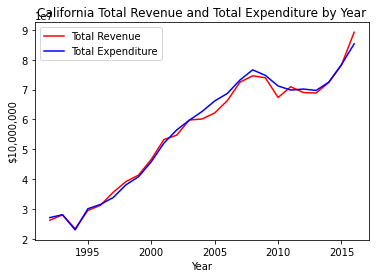

In [6]:
# Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during these years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
california_total_revenue = df[df['STATE'] == 'CALIFORNIA']['TOTAL_REVENUE']
california_total_expenditure = df[df['STATE'] == 'CALIFORNIA']['TOTAL_EXPENDITURE']
year = df[df['STATE'] == 'CALIFORNIA']['YEAR']

# Create a line graph of the total revenue and total expenditure for California by year
plt.plot(year, california_total_revenue, color='red', label='Total Revenue')
plt.plot(year, california_total_expenditure, color='blue', label='Total Expenditure')
plt.legend()
plt.title('California Total Revenue and Total Expenditure by Year')
plt.xlabel('Year')
#plotting y label with 10million dollar sign
plt.ylabel('$10,000,000')
plt.show()






In [7]:
# How do these two variables evolve during these years?
# between the years 1995 and 2002, the total revenue slightly greater than the total expenditure.
# between the years 2002 and 2010, the total expenditure greater than the total revenue.
# after 2010, they almost equal.

# Try to explain the peaks and troughs with some state-wise news and information around those dates.
# in 1995, both revenue and expenditure reached the troughs.
# after 1993, there is an increasing time trend up to 2008
# between 2008 and 2013, the total expenditure is greater than the total revenue.
# and then after 2014, both revenue and expenditure start rising again and passed peak of 2008.



In [8]:

#In your chosen state, which one of the lessons the students are more successful, math or reading?
#  AVG_READING_8_SCORE graph of California
#  AVG_MATH_8_SCORE graph of California
california_avg_reading_8_score = df[df['STATE'] == 'CALIFORNIA']['AVG_READING_8_SCORE']
california_avg_math_8_score = df[df['STATE'] == 'CALIFORNIA']['AVG_MATH_8_SCORE']


In [9]:
#describe of AVG_READING_8_SCORE for California
california_avg_reading_8_score.describe()


count     11.000000
mean     255.000000
std        4.898979
min      250.000000
25%      251.000000
50%      253.000000
75%      259.000000
max      263.000000
Name: AVG_READING_8_SCORE, dtype: float64

In [10]:
#describe of AVG_MATH_8_SCORE for California
california_avg_math_8_score.describe()

count     12.000000
mean     269.166667
std        6.965282
min      256.000000
25%      265.500000
50%      270.000000
75%      275.250000
max      277.000000
Name: AVG_MATH_8_SCORE, dtype: float64

In [11]:
# In California, the students are more successful in math 
# because the average math score is higher than the average reading score.

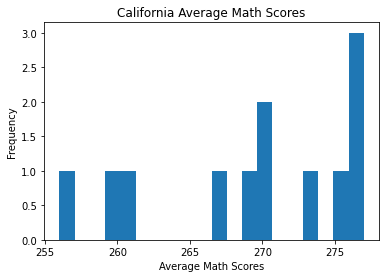

In [12]:
# What are the distributions of the math and reading scores in the sample?
# Create a histogram of the math scores
plt.hist(california_avg_math_8_score, bins=20)
plt.title('California Average Math Scores')
plt.xlabel('Average Math Scores')
plt.ylabel('Frequency')
plt.show()






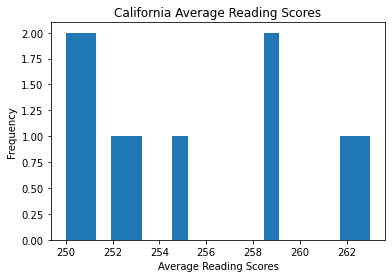

In [13]:
# type of the distribution of the math scores
# Create a histogram of the reading scores
plt.hist(california_avg_reading_8_score, bins=20)
plt.title('California Average Reading Scores')
plt.xlabel('Average Reading Scores')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Notice that there are too many missing values for math and reading scores. Fill out the missing values using mean, median and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables
# Fill out the missing values using mean
california_avg_math_8_score_filled_mean = california_avg_math_8_score.fillna(california_avg_math_8_score.mean())
california_avg_reading_8_score_filled_mean = california_avg_reading_8_score.fillna(california_avg_reading_8_score.mean())


In [15]:
# print filled mean of math scores
print(california_avg_math_8_score_filled_mean)
# check nan values of math scores
print(california_avg_math_8_score.isnull().sum())



4       261.000000
55      269.166667
106     269.166667
157     269.166667
208     269.166667
259     269.166667
310     269.166667
361     269.166667
412     260.000000
463     269.166667
514     269.166667
565     267.000000
616     269.166667
667     269.000000
718     269.166667
769     270.000000
820     269.166667
871     270.000000
922     269.166667
973     273.000000
1024    269.166667
1075    276.000000
1126    269.166667
1177    275.000000
1228    269.166667
1303    269.166667
1304    269.166667
1305    269.166667
1306    269.166667
1307    256.000000
1308    269.166667
1309    277.000000
1666    276.000000
Name: AVG_MATH_8_SCORE, dtype: float64
21


In [16]:
# print filled mean of reading scores
print(california_avg_reading_8_score_filled_mean)
# check nan values of reading scores
print(california_avg_reading_8_score.isnull().sum())

4       255.0
55      255.0
106     255.0
157     255.0
208     255.0
259     255.0
310     252.0
361     255.0
412     255.0
463     255.0
514     250.0
565     251.0
616     255.0
667     250.0
718     255.0
769     251.0
820     255.0
871     253.0
922     255.0
973     255.0
1024    255.0
1075    262.0
1126    255.0
1177    259.0
1228    255.0
1303    255.0
1304    255.0
1305    255.0
1306    255.0
1307    255.0
1308    255.0
1309    263.0
1666    259.0
Name: AVG_READING_8_SCORE, dtype: float64
22


In [17]:
# fill out the missing values using median
california_avg_math_8_score_filled_median = california_avg_math_8_score.fillna(california_avg_math_8_score.median())
california_avg_reading_8_score_filled_median = california_avg_reading_8_score.fillna(california_avg_reading_8_score.median())


In [18]:
# print filled median of math scores
print(california_avg_math_8_score_filled_median)
# check nan values of math scores
print(california_avg_math_8_score.isnull().sum())

4       261.0
55      270.0
106     270.0
157     270.0
208     270.0
259     270.0
310     270.0
361     270.0
412     260.0
463     270.0
514     270.0
565     267.0
616     270.0
667     269.0
718     270.0
769     270.0
820     270.0
871     270.0
922     270.0
973     273.0
1024    270.0
1075    276.0
1126    270.0
1177    275.0
1228    270.0
1303    270.0
1304    270.0
1305    270.0
1306    270.0
1307    256.0
1308    270.0
1309    277.0
1666    276.0
Name: AVG_MATH_8_SCORE, dtype: float64
21


In [19]:
#   print filled median of reading scores
print(california_avg_reading_8_score_filled_median)
# check nan values of reading scores
print(california_avg_reading_8_score.isnull().sum())

4       253.0
55      253.0
106     253.0
157     253.0
208     253.0
259     253.0
310     252.0
361     253.0
412     253.0
463     253.0
514     250.0
565     251.0
616     253.0
667     250.0
718     253.0
769     251.0
820     253.0
871     253.0
922     253.0
973     255.0
1024    253.0
1075    262.0
1126    253.0
1177    259.0
1228    253.0
1303    253.0
1304    253.0
1305    253.0
1306    253.0
1307    253.0
1308    253.0
1309    263.0
1666    259.0
Name: AVG_READING_8_SCORE, dtype: float64
22


In [20]:
# fill out the missing values using linear interpolation
california_avg_math_8_score_filled_linear = california_avg_math_8_score.fillna(california_avg_math_8_score.interpolate())
california_avg_reading_8_score_filled_linear = california_avg_reading_8_score.fillna(california_avg_reading_8_score.interpolate())


In [21]:
# print filled linear of math scores
print(california_avg_math_8_score_filled_linear)
# check nan values of math scores
print(california_avg_math_8_score.isnull().sum())


4       261.000000
55      260.875000
106     260.750000
157     260.625000
208     260.500000
259     260.375000
310     260.250000
361     260.125000
412     260.000000
463     262.333333
514     264.666667
565     267.000000
616     268.000000
667     269.000000
718     269.500000
769     270.000000
820     270.000000
871     270.000000
922     271.500000
973     273.000000
1024    274.500000
1075    276.000000
1126    275.500000
1177    275.000000
1228    271.833333
1303    268.666667
1304    265.500000
1305    262.333333
1306    259.166667
1307    256.000000
1308    266.500000
1309    277.000000
1666    276.000000
Name: AVG_MATH_8_SCORE, dtype: float64
21


In [22]:
# print filled linear of reading scores
print(california_avg_reading_8_score_filled_linear)
# check nan values of reading scores
print(california_avg_reading_8_score.isnull().sum())

4         NaN
55        NaN
106       NaN
157       NaN
208       NaN
259       NaN
310     252.0
361     251.5
412     251.0
463     250.5
514     250.0
565     251.0
616     250.5
667     250.0
718     250.5
769     251.0
820     252.0
871     253.0
922     254.0
973     255.0
1024    258.5
1075    262.0
1126    260.5
1177    259.0
1228    259.5
1303    260.0
1304    260.5
1305    261.0
1306    261.5
1307    262.0
1308    262.5
1309    263.0
1666    259.0
Name: AVG_READING_8_SCORE, dtype: float64
22


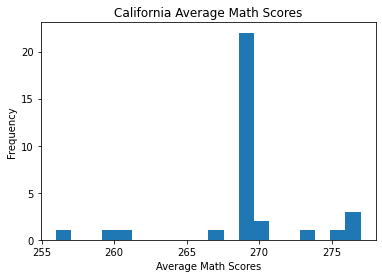

In [23]:
# comparing the distributions of the math and reading scores
# Create a histogram of the math scores
plt.hist(california_avg_math_8_score_filled_mean, bins=20)
plt.title('California Average Math Scores')
plt.xlabel('Average Math Scores')
plt.ylabel('Frequency')
plt.show()


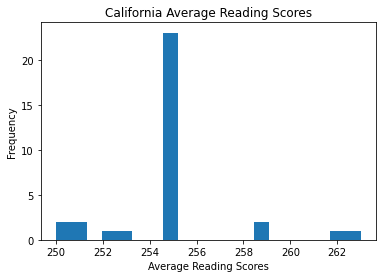

In [24]:
# Create a histogram of the reading scores
plt.hist(california_avg_reading_8_score_filled_mean, bins=20)
plt.title('California Average Reading Scores')
plt.xlabel('Average Reading Scores')
plt.ylabel('Frequency')
plt.show()

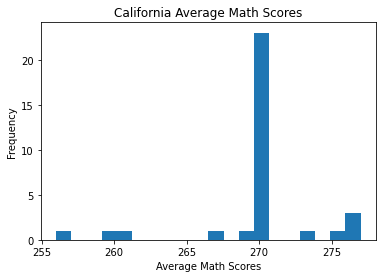

In [25]:
# comparing the distributions of the math and reading scores
# Create a histogram of the math scores
plt.hist(california_avg_math_8_score_filled_median, bins=20)
plt.title('California Average Math Scores')
plt.xlabel('Average Math Scores')
plt.ylabel('Frequency')
plt.show()

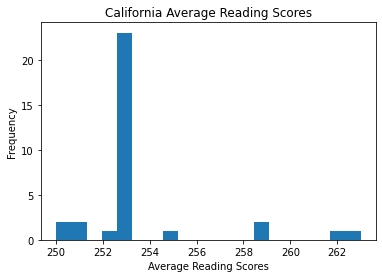

In [26]:
# Create a histogram of the reading scores
plt.hist(california_avg_reading_8_score_filled_median, bins=20)
plt.title('California Average Reading Scores')
plt.xlabel('Average Reading Scores')
plt.ylabel('Frequency')
plt.show()

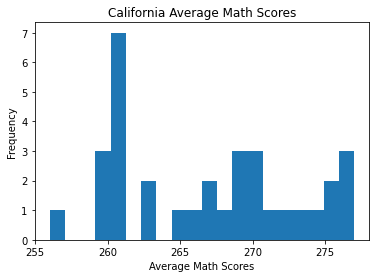

In [27]:
# comparing the distributions of the math and reading scores
# Create a histogram of the math scores
plt.hist(california_avg_math_8_score_filled_linear, bins=20)
plt.title('California Average Math Scores')
plt.xlabel('Average Math Scores')
plt.ylabel('Frequency')
plt.show()


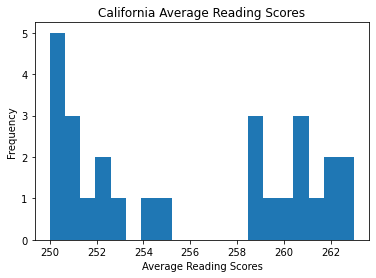

In [28]:
# Create a histogram of the reading scores
plt.hist(california_avg_reading_8_score_filled_linear, bins=20)
plt.title('California Average Reading Scores')
plt.xlabel('Average Reading Scores')
plt.ylabel('Frequency')
plt.show()

In [29]:
# import students performance data
students_performance = pd.read_csv('StudentsPerformance.csv')


In [30]:
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
# describe of students performance
students_performance.describe()






,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [32]:
# creating a column for students mean performance score in math, reading and writing
students_performance['mean_overall_score'] = students_performance.apply(lambda row: (row['math score'] + row['reading score'] + row['writing score']) / 3, axis=1)
students_performance.head(20)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_overall_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,77.333333
6,female,group B,some college,standard,completed,88,95,92,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,49.333333


In [33]:
# if gender female
female_performance = students_performance[students_performance['gender'] == 'female']['mean_overall_score'].mean()
print(female_performance)

 

69.56949806949807


In [34]:
# if gender male
male_performance = students_performance[students_performance['gender'] == 'male']['mean_overall_score'].mean()
print(male_performance)



65.8374827109267


In [35]:
groupA_performance = students_performance[students_performance['race/ethnicity'] == 'group A']['mean_overall_score'].mean()
print(groupA_performance)

62.992509363295895


In [36]:
groupB_performance = students_performance[students_performance['race/ethnicity'] == 'group B']['mean_overall_score'].mean()
print(groupB_performance)

65.46842105263158


In [37]:
groupC_performance = students_performance[students_performance['race/ethnicity'] == 'group C']['mean_overall_score'].mean()
print(groupC_performance)

67.13166144200628


In [38]:
groupD_performance = students_performance[students_performance['race/ethnicity'] == 'group D']['mean_overall_score'].mean()
print(groupD_performance)

69.1793893129771


In [39]:
 import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn import datasets

students_performance = pd.read_csv('StudentsPerformance.csv')
students_performance.head()



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [40]:
# change the column names to lowercase  and replace spaces with underscores and seperators with underscores
students_performance.columns = students_performance.columns.str.lower()
students_performance.columns = students_performance.columns.str.replace(' ', '_')
students_performance.columns = students_performance.columns.str.replace('/', '_')
students_performance.columns = students_performance.columns.str.replace('-', '_')
students_performance.columns = students_performance.columns.str.replace('.', '_')
students_performance.columns = students_performance.columns.str.replace('(', '_')
students_performance.head()

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_5187/1807288306.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  students_performance.columns = students_performance.columns.str.replace('.', '_')
/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_5187/1807288306.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  students_performance.columns = students_performance.columns.str.replace('(', '_')


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [41]:
# create a function for categorize 
def process_categorical(students_performance):
    dummies_gender = pd.get_dummies(students_performance['gender'], prefix = 'gender', drop_first=True)
    dummies_race = pd.get_dummies(students_performance['race_ethnicity'], prefix = 'race_ethnicity', drop_first=True)
    dummies_education = pd.get_dummies(students_performance['parental_level_of_education'], prefix = 'parental_level_of_education', drop_first=True)

    students_performance.drop(['gender', 'race_ethnicity', 'parental_level_of_education'], axis = 1, inplace = True)

    return pd.concat([students_performance, dummies_gender, dummies_race, dummies_education], axis =1)

data = process_categorical(students_performance)

In [42]:
# change the column names to lowercase  and replace spaces with underscores and seperators with underscores
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('/', '_')
data.columns = data.columns.str.replace('-', '_')
data.columns = data.columns.str.replace('.', '_')
data.columns = data.columns.str.replace('(', '_')
data.columns = data.columns.str.replace('\'', '_')
data.head()

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_5187/926517840.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace('.', '_')
/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_5187/926517840.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace('(', '_')


,lunch,test_preparation_course,math_score,reading_score,writing_score,gender_male,race_ethnicity_group_b,race_ethnicity_group_c,race_ethnicity_group_d,race_ethnicity_group_e,parental_level_of_education_bachelor_s_degree,parental_level_of_education_high_school,parental_level_of_education_master_s_degree,parental_level_of_education_some_college,parental_level_of_education_some_high_school
0,standard,none,72,72,74,0,1,0,0,0,1,0,0,0,0
1,standard,completed,69,90,88,0,0,1,0,0,0,0,0,1,0
2,standard,none,90,95,93,0,1,0,0,0,0,0,1,0,0
3,free/reduced,none,47,57,44,1,0,0,0,0,0,0,0,0,0
4,standard,none,76,78,75,1,0,1,0,0,0,0,0,1,0


In [43]:
reg1 = 'math_score ~ gender_male + race_ethnicity_group_b + race_ethnicity_group_c + race_ethnicity_group_d + race_ethnicity_group_e + parental_level_of_education_bachelor_s_degree + parental_level_of_education_high_school + parental_level_of_education_master_s_degree + parental_level_of_education_some_college + parental_level_of_education_some_high_school'


In [44]:
reg1output = smf.ols(reg1, data).fit()

In [45]:
print(reg1output.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     12.26
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           3.26e-20
Time:                        22:19:18   Log-Likelihood:                -4078.9
No. Observations:                1000   AIC:                             8180.
Df Residuals:                     989   BIC:                             8234.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [46]:
# 7. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?


In [74]:
students_performance = pd.read_csv('StudentsPerformance.csv')
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [75]:
students_performance.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [76]:
# create a column for students mean performance score in math, reading and writing
students_performance['mean_overall_score'] = students_performance.apply(lambda row: (row['math score'] + row['reading score'] + row['writing score']) / 3, axis=1)
students_performance.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_overall_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,77.333333
6,female,group B,some college,standard,completed,88,95,92,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,49.333333


In [77]:


import seaborn as sns
import matplotlib.pyplot as plt




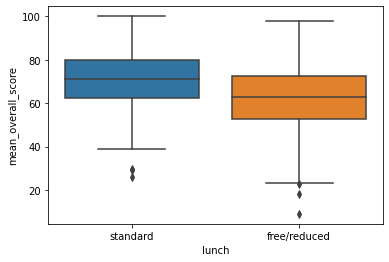

In [78]:
# creating a boxplot for lunch type standard
sns.boxplot(x='lunch', y='mean_overall_score', data=students_performance)
plt.show()


In [73]:
# creating ttest for lunch type standard
from scipy import stats
stats.ttest_ind(students_performance[students_performance['lunch'] == 'standard']['mean_overall_score'], students_performance[students_performance['lunch'] == 'free/reduced']['mean_overall_score'])

# The p value is less than 0.05, so we can reject the null hypothesis. That means that there is a difference between the lunch types on the basis of their performance in exams.


Ttest_indResult(statistic=9.575113051511476, pvalue=7.736791812495384e-21)

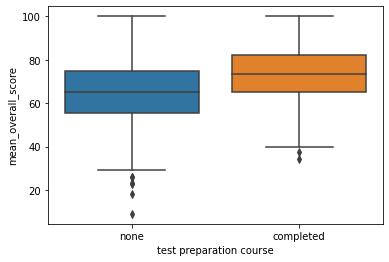

Ttest_indResult(statistic=-8.390944443482592, pvalue=1.633780203592351e-16)

In [81]:
# 8. Does the test preparation course seem to have an effect on the exam performances?
# creating a boxplot for test preparation course
sns.boxplot(x='test preparation course', y='mean_overall_score', data=students_performance)
plt.show()
#ttest for test preparation course
stats.ttest_ind(students_performance[students_performance['test preparation course'] == 'none']['mean_overall_score'], students_performance[students_performance['test preparation course'] == 'completed']['mean_overall_score'])
# The p value is less than 0.05, so we can reject the null hypothesis. That means that there is a difference between the test preparation course on the basis of their performance in exams.

In [156]:
# 9. Find the correlation coefficient and sort in ascending order
# creating a correlation matrix
corr = students_performance.corr()
# dropping the mean_overall_score column
corr.drop(['mean_overall_score'], axis = 1, inplace = True)
# dropping the mean_overall_score row
corr.drop(['mean_overall_score'], axis = 0, inplace = True)
corr.head()





,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [160]:

corr_matrix = corr.abs().unstack().sort_values(ascending = False)
corr_matrix.head(10)
# removing 1s from the correlation matrix
corr_matrix = corr_matrix[corr_matrix < 1]
#corr_matrix.head(10)
# removing duplicates
corr_matrix = corr_matrix.drop_duplicates()
#corr_matrix.head(10)
# sorting the correlation matrix
corr_matrix = corr_matrix.sort_values(ascending = False)
corr_matrix.head(10)



reading score  writing score    0.954598
math score     reading score    0.817580
               writing score    0.802642
dtype: float64

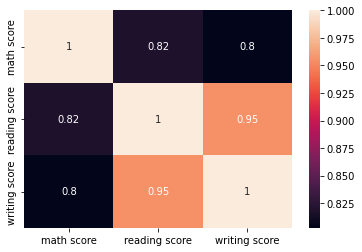

In [132]:
# 10. Which two exam scores are correlated the most with each other?
# creating a heatmap
sns.heatmap(corr, annot=True)
plt.show()
# Reading and Writing scores are the most correlated with each other.



